<a href="https://colab.research.google.com/github/carsonasmith17/labs/blob/main/Hedonistic_Pricing_and_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd


In [44]:
data = pd.read_csv('cars_hw.csv')

print(data.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


In [45]:
missing_values = data.isnull().sum()
data = data.dropna()

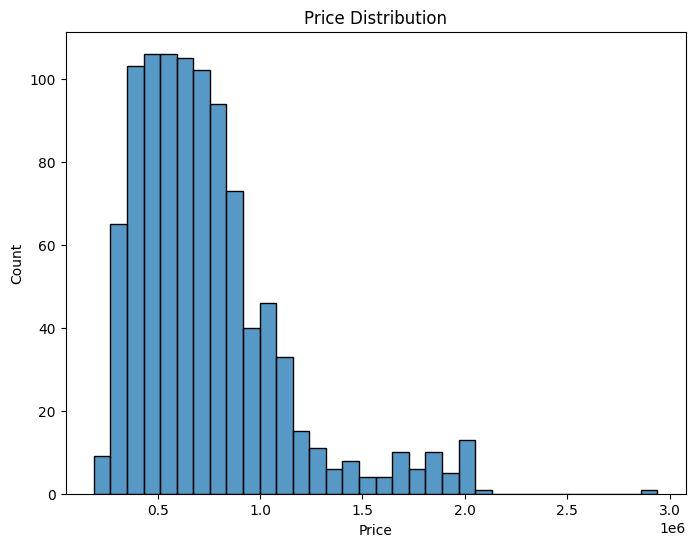

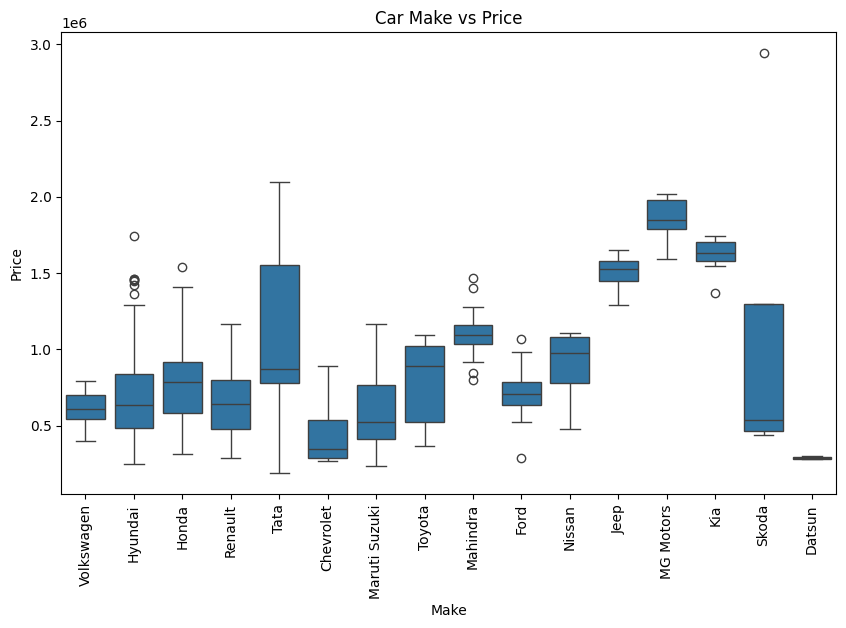

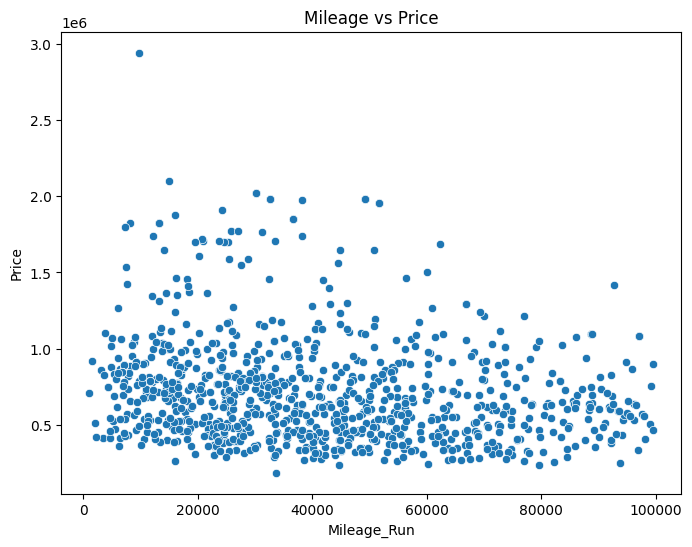

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Price'])
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Make', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('Car Make vs Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mileage_Run', y='Price', data=data)
plt.title('Mileage vs Price')
plt.show()

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

data = pd.get_dummies(data, drop_first=True)

data['Price'] = np.log1p(data['Price'])

scaler = StandardScaler()
numerical_features = ['Mileage_Run', 'Make_Year']
data[numerical_features] = scaler.fit_transform(data[numerical_features]) #used chatgpt/gemini to help with this

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #used chatpgt/gemini for this too

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

y_train_pred = simple_model.predict(X_train)
y_test_pred = simple_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Simple Model - RMSE (Train): {rmse_train}, RMSE (Test): {rmse_test}')
print(f'Simple Model - R^2 (Train): {r2_train}, R^2 (Test): {r2_test}')   #used chatpgt/gemini for help with this too

Simple Model - RMSE (Train): 0.0018873578583490243, RMSE (Test): 0.0017787766898981075
Simple Model - R^2 (Train): 0.7412298024440203, R^2 (Test): 0.7552145748004284


the lower RMSE test value indicates that the model performs well/is accurate. Further, the higher r^2 value indicates that the underlying data pattern is captured

In [40]:

X_train['Make_Year'] = X_train['Mileage_Run'] * X_train['Make_Year']
X_test['Make_Year'] = X_test['Mileage_Run'] * X_test['Make_Year']

complex_model = LinearRegression()
complex_model.fit(X_train, y_train)

y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
r2_train_complex = r2_score(y_train, y_train_pred_complex)
r2_test_complex = r2_score(y_test, y_test_pred_complex)

print(f'Complex Model - RMSE (Train): {rmse_train_complex}, RMSE (Test): {rmse_test_complex}')
print(f'Complex Model - R^2 (Train): {r2_train_complex}, R^2 (Test): {r2_test_complex}')        #and also used chatpgt/gemini for help with this


Complex Model - RMSE (Train): 0.0019500950092654857, RMSE (Test): 0.0018686158462214737
Complex Model - R^2 (Train): 0.7237404553628626, R^2 (Test): 0.7298638216389937


while the complex model works well, there is the chance that the data could be subject to over/underfitting with more complexity

6. steps 1 and 2 were quite easy, as they consisted of basic cleaning and visualization. 3 was a bit more advanced, as I don't yet have much familiarity with converting types of data, but it wasn't too diffiuclt with the help of AI. 4 and 5, of course, were the most difficult, as I had to be quite thurough in making sure all of my code was iterative. I wasn't entirely familiar with this type of modeling, so I did use AI to help set the models up, wihch waas immensely helpful in informing a deeper understanding of how RMSE and R^2 differ, and how more complex models are more suceptible to overfitting and underfitting. Overall, admittedly the use of AI was quite informative of how to go about the assignment, and functioned as a search engine for this lab.

# ** LINEAR REGRESSION**

Q0

1. Linear regression models are "linear" because the outcome is a linear combination of features and their coefficients. The term "linear" refers to this additive relationship of coefficients to the target.

2. The coefficient for a dummy variable shows the change in the outcome relative to a baseline group. With an intercept, each coefficient reflects the difference from this baseline.

3. Linear regression can be used for binary classification, but it’s not ideal. It can predict values outside the 0–1 range, unlike logistic regression, which is better suited for classification.

4. Overfitting signs include high training accuracy but poor test accuracy, sensitivity to small data changes, and large standard errors.

5. Multicollinearity means predictors are highly correlated, complicating coefficient estimates. Two-stage least squares (2SLS) reduces multicollinearity's effect by using instruments to isolate a variable’s exogenous component.

6.
- Polynomial terms: Adding powers of features (ex. x^2) captures curvature
- Interaction terms: Including interactions (ex. x X y) allows effects to vary based on other features.

7.
- Intercept: Expected outcome when predictors are zero.
- Slope coefficient: Expected change in the outcome for a one-unit increase in a predictor.
- Dummy variable coefficient: Difference in outcome from the baseline group.

Q1

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [48]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

Manahttan is priciest on average

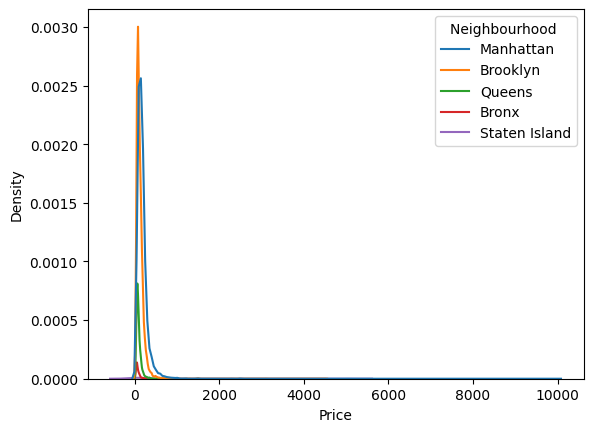

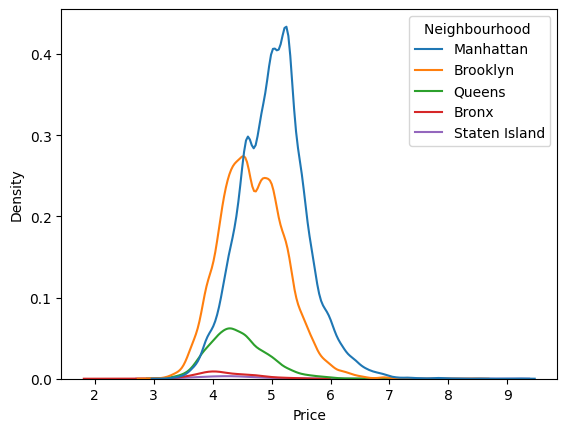

In [49]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

2.

In [53]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})

The regression is just a group average because there arent any other variables to compare to

3.

In [52]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


4.

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [55]:
100*1.032257 + 89.4

192.6257

the most expensive kind of property you can get is a 100 rated place in Manhattan

5.

In [57]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


an entire home in manhattan would cost

In [58]:
110.617+53.69+100*.0626

170.567

6. the difference is the type of room; changes in the room type available can actually be predictive of pricing in different neighborhoods -- this is why other variabes become less predictive without the room type -- because price is correlated with the room type